opticspy can do phase shift interferogram simulation
It also can rebuild surface from interferograms got from phase shift interferometer(PSI)
1. Phase shift interferometer simulation based on Zernike Polynomials (with or withour noise)
2. Use 4-step interferogram from PSI to rebuild surface
3. Use zernike polynomials fitting process to analyse aberrations.
We could simulate phase shift interferometer based on Zernike Polynomials by opticspy

In [1]:
%matplotlib inline
import opticspy

First use the zernike function to construct a Zernike Coefficient Class, we could see its surface

Z5 =  0.3 Z22 Primary Astigmatism at 45
Z6 =  0.2 Z22 Primary Astigmatism at 0
Z8 =  0.2 Z31 Primary x Coma


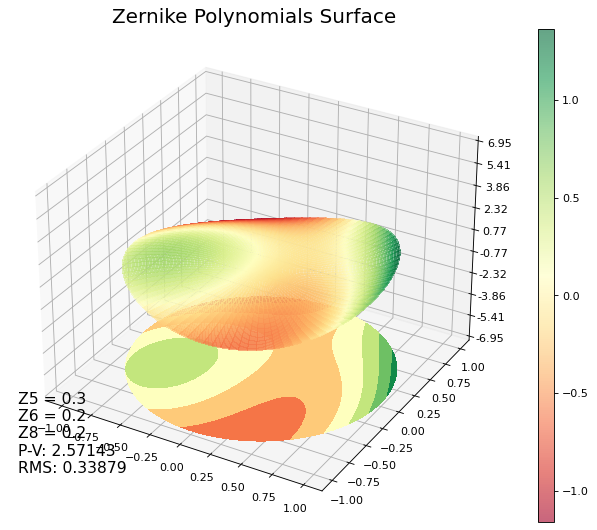

In [2]:
Z = opticspy.zernike.Coefficient(Z5=0.3,Z6=0.2,Z8=0.2)
Z.zernikesurface()

Then let's simulate 4-step phase shift interferograms by this phase_shift function. The phase shifted 0, 1/2pi, pi and 3/2pi

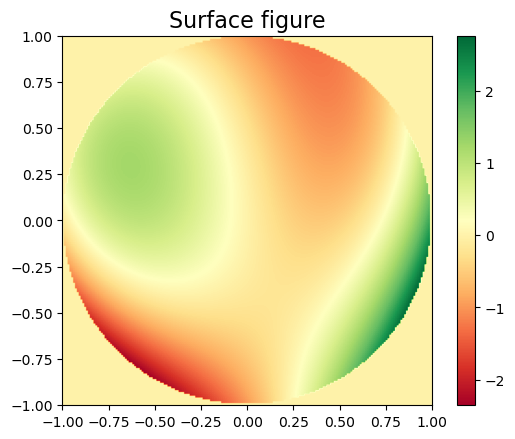

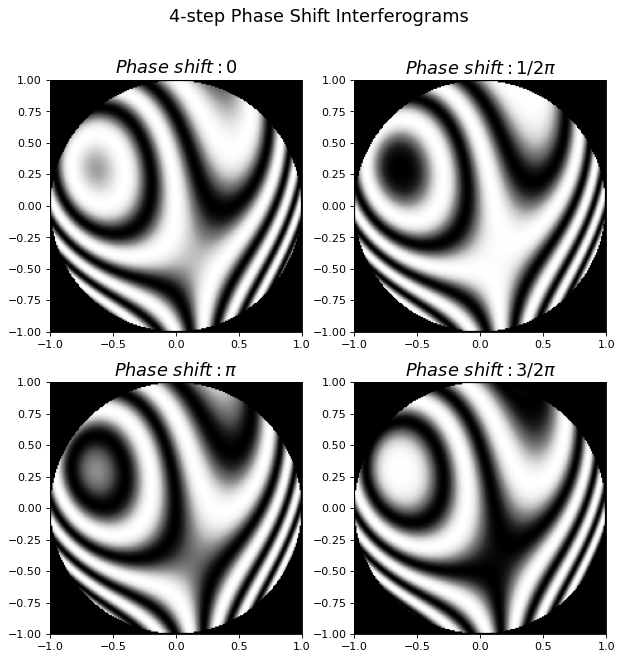

In [3]:
PSI = opticspy.interferometer_zenike.phase_shift(Z)

Now, the 4 interferogram we get above are what a PSI will give us. How could we rebuild surface with these interferogram?
Use rebuild_surface function, we could first rebuild phase, but it is wraped. Then use the unwrap method(from Gregor Thalhammer, http://github.com/geggo/phase-unwrap), we could unwrap phase and rebuild surface. This function will return the matrix of the rebuild surface. There also some simple 1D and 2D unwrap functions in phaseunwrap.py file.

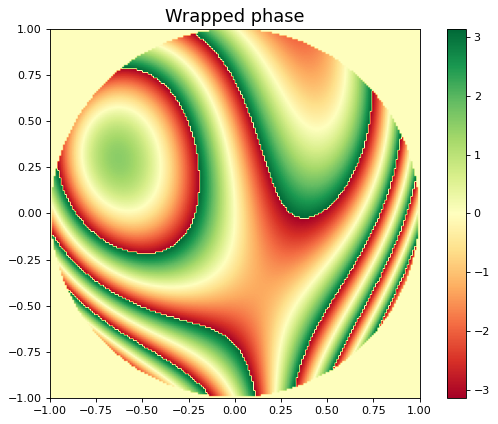

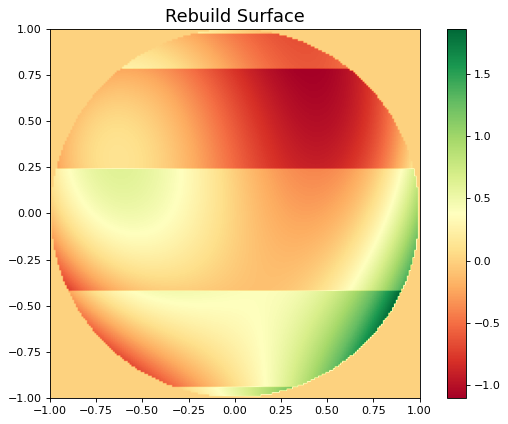

In [4]:
S = opticspy.interferometer_zenike.rebuild_surface(PSI)

At last we could use Zernike fitting method to analyse the surface we got. Fitting function will print put the fit results and return a Zernike coefficient class. By this class we could analyse surface in detail.

In [5]:
Z1,C = opticspy.zernike.fitting(S,10)

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 |-0.001 | 0.303 | 0.059 | 0.296 | 0.114 |-0.065 | 0.197 | 0.064 |-0.000 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
| 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.000 |

Z2 =  -0.001 Z11 x Tilt
Z3 =  0.303 Z11 y Tilt
Z4 =  0.059 Z20 Defocus
Z5 =  0.296 Z22 Primary Astigmatism at 45
Z6 =  0.114 Z22 Primary Astigmatism at 0
Z7 =  -0.065 Z31 Primary y Coma
Z8 =  0.197 Z31 Primary x Coma
Z9 =  0.064 Z33 y Trefoil


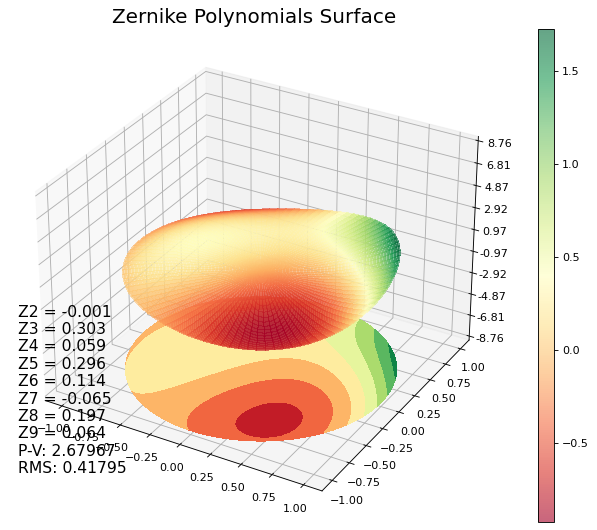

In [6]:
C.zernikesurface()

Z2 =  -0.001 Z11 x Tilt
Z3 =  0.303 Z11 y Tilt
Z4 =  0.059 Z20 Defocus
Z5 =  0.296 Z22 Primary Astigmatism at 45
Z6 =  0.114 Z22 Primary Astigmatism at 0
Z7 =  -0.065 Z31 Primary y Coma
Z8 =  0.197 Z31 Primary x Coma
Z9 =  0.064 Z33 y Trefoil


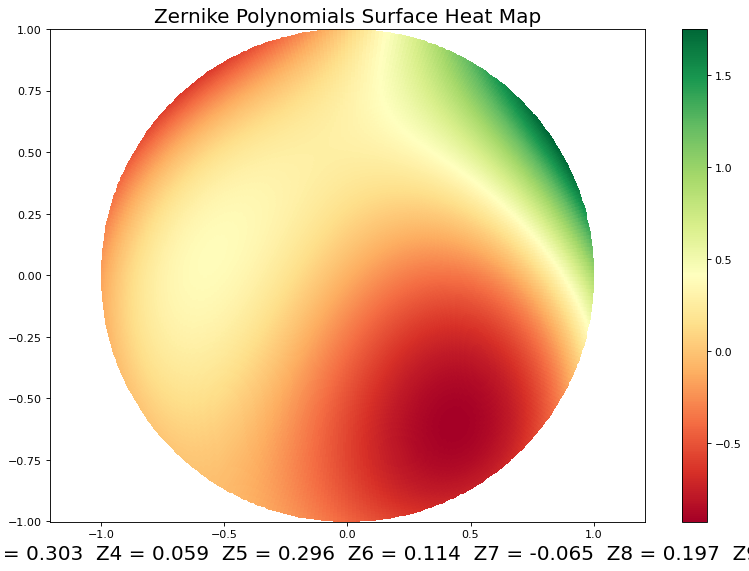

In [7]:
C.zernikemap()

Now let see an example which the interferograms have noise, and we could see how the program work under noise condition (noise 10% gaussian noise on interferograms). We could find that the surface_rebuild function works well.

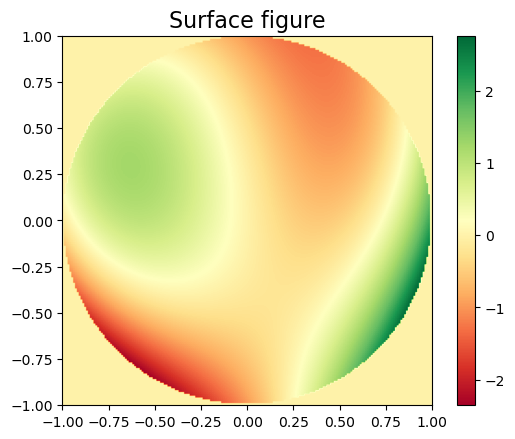

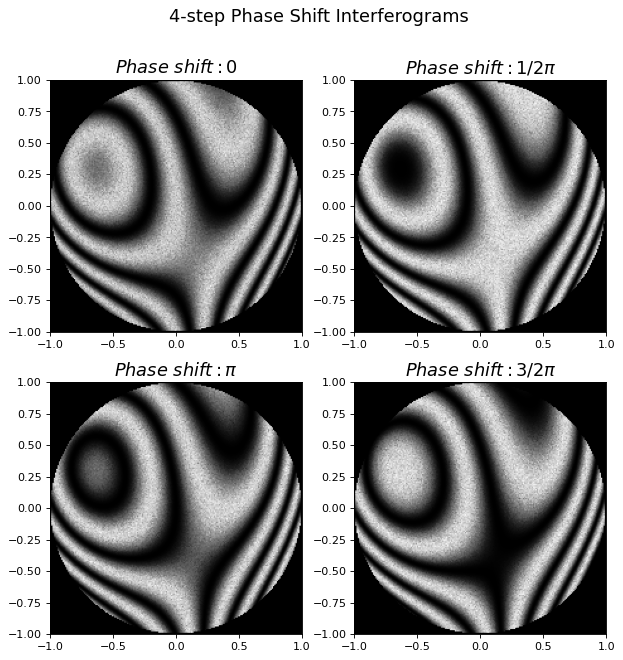

In [8]:
PSI = opticspy.interferometer_zenike.phase_shift(Z,noise = 0.1)

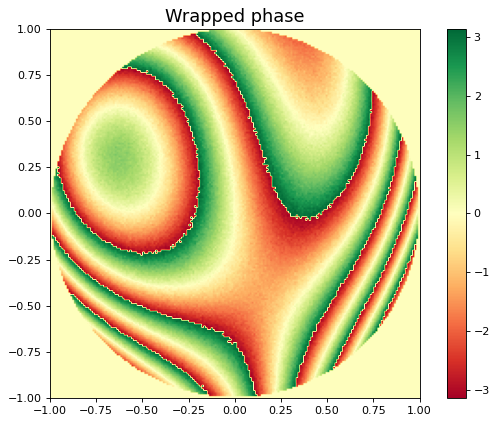

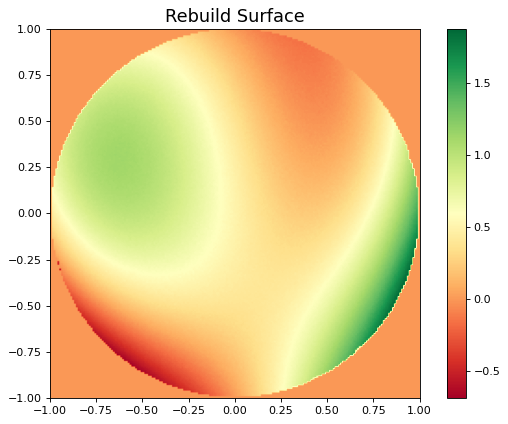

In [9]:
S = opticspy.interferometer_zenike.rebuild_surface(PSI)

In [10]:
Z1,C = opticspy.zernike.fitting(S,10)

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 |-0.001 |-0.000 |-0.002 | 0.296 | 0.197 |-0.000 | 0.197 |-0.000 |-0.000 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
| 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.000 |

Z2 =  -0.001 Z11 x Tilt
Z4 =  -0.002 Z20 Defocus
Z5 =  0.296 Z22 Primary Astigmatism at 45
Z6 =  0.197 Z22 Primary Astigmatism at 0
Z8 =  0.197 Z31 Primary x Coma


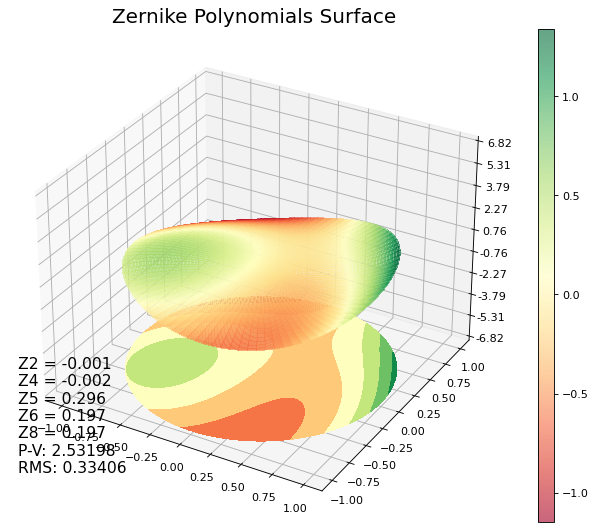

In [11]:
C.zernikesurface()